In [25]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from skimage import  img_as_float, color, exposure
from skimage.restoration import unwrap_phase
import matplotlib.transforms as mtransforms

CMAP = 'gray'

In [7]:
def set_axes_equal(ax: plt.Axes):
    limits = np.array([
        ax.get_xlim3d(),
        ax.get_ylim3d(),
        ax.get_zlim3d(),
    ])
    origin = np.mean(limits, axis=1)
    radius = 0.5 * np.max(np.abs(limits[:, 1] - limits[:, 0]))
    _set_axes_radius(ax, origin, radius)
    
def _set_axes_radius(ax, origin, radius):
    x, y, z = origin
    ax.set_xlim3d([x - radius, x + radius])
    ax.set_ylim3d([y - radius, y + radius])
    ax.set_zlim3d([z - radius, z + radius])
    

Text(0, 0.5, 'y(cm)')

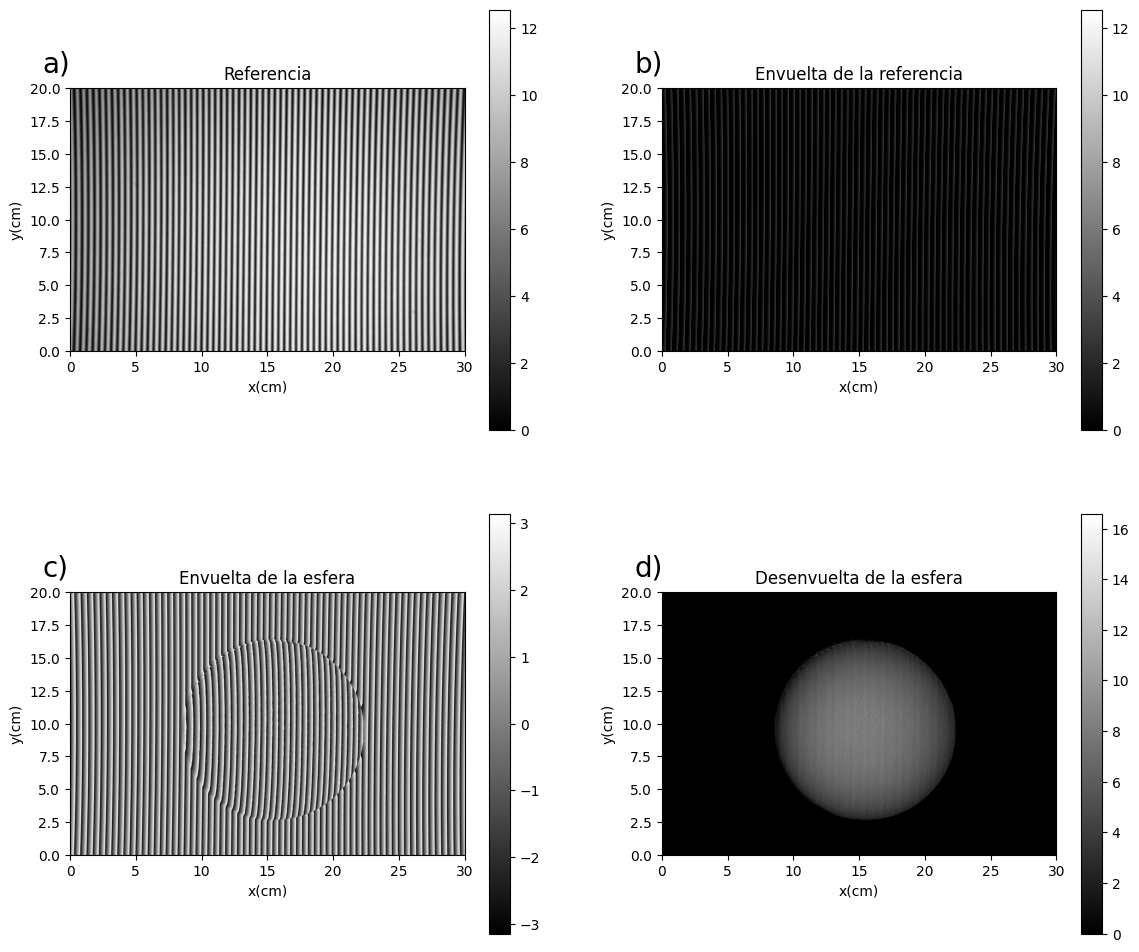

In [37]:

imagenr1 = Image.open("referencia1.JPG")
imagenr1 = color.rgb2gray(img_as_float(imagenr1))

imagenr2 = Image.open("referencia2.jpeg")
imagenr2 = color.rgb2gray(img_as_float(imagenr2))

imagenr3 = Image.open("referencia3.JPG")
imagenr3 = color.rgb2gray(img_as_float(imagenr3))

imagenr4 = Image.open("referencia4.JPG")
imagenr4 = color.rgb2gray(img_as_float(imagenr4))


imagenc1 = Image.open("esfera1.JPG")
imagenc1 = color.rgb2gray(img_as_float(imagenc1))

imagenc2 = Image.open("esfera2.JPG")
imagenc2 = color.rgb2gray(img_as_float(imagenc2))

imagenc3 = Image.open("esfera3.JPG")
imagenc3 = color.rgb2gray(img_as_float(imagenc3))

imagenc4 = Image.open("esfera4.JPG")
imagenc4 = color.rgb2gray(img_as_float(imagenc4))

imagenr1 = exposure.rescale_intensity(imagenr1, out_range=(0, np.pi*4))
imagenr2 = exposure.rescale_intensity(imagenr2, out_range=(0, np.pi*4))
imagenr3 = exposure.rescale_intensity(imagenr3, out_range=(0, np.pi*4))
imagenr4 = exposure.rescale_intensity(imagenr4, out_range=(0, np.pi*4))

imagenc1 = exposure.rescale_intensity(imagenc1, out_range=(0, np.pi*4))
imagenc2 = exposure.rescale_intensity(imagenc2, out_range=(0, np.pi*4))
imagenc3 = exposure.rescale_intensity(imagenc3, out_range=(0, np.pi*4))
imagenc4 = exposure.rescale_intensity(imagenc4, out_range=(0, np.pi*4))

env_esf = np.arctan2(imagenc4 - imagenc2, imagenc1 - imagenc3)
env_ref = np.arctan2(imagenr4 - imagenr2, imagenr1 - imagenr3)

des_esf = unwrap_phase(env_ref-env_esf)

phi=des_esf
dx=0.7

arg=phi/(2*np.pi)
arg1=arg*dx
final=arg1/np.tan(0.06795)
final=np.where(final>0,final,0)
x, y = np.meshgrid(np.linspace(0*1.5,20*1.5,des_esf.shape[1]), np.linspace(0,20,des_esf.shape[0]))

fig, ax = plt.subplots(2, 2, figsize=[14,12])

ax = ax.ravel()
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)

fig.colorbar(ax[0].imshow(imagenr1, cmap=CMAP, vmin=0, vmax=4 * np.pi, extent=[0,20*1.5,0,20]), ax=ax[0])
ax[0].text(0.0, 1.0, 'a)', transform=ax[0].transAxes + trans,
            fontsize=20, va='bottom')
ax[0].set_title('Referencia')
ax[0].set_xlabel('x(cm)')
ax[0].set_ylabel('y(cm)')
fig.colorbar(ax[1].imshow(env_ref, cmap=CMAP, vmin=0, vmax=4 * np.pi, extent=[0,20*1.5,0,20]), ax=ax[1])
ax[1].text(0.0, 1.0, 'b)', transform=ax[1].transAxes + trans,
            fontsize=20, va='bottom')
ax[1].set_title('Envuelta de la referencia')
ax[1].set_xlabel('x(cm)')
ax[1].set_ylabel('y(cm)')
fig.colorbar(ax[2].imshow(env_esf, cmap=CMAP, vmin=-np.pi, vmax=np.pi, extent=[0,20*1.5,0,20]),ax=ax[2])
ax[2].text(0.0, 1.0, 'c)', transform=ax[2].transAxes + trans,
            fontsize=20, va='bottom')
ax[2].set_title('Envuelta de la esfera')
ax[2].set_xlabel('x(cm)')
ax[2].set_ylabel('y(cm)')
fig.colorbar(ax[3].imshow(final , cmap=CMAP,extent=[0,20*1.5,0,20]), ax=ax[3])
ax[3].text(0.0, 1.0, 'd)', transform=ax[3].transAxes + trans,
            fontsize=20, va='bottom')
ax[3].set_title('Desenvuelta de la esfera')
ax[3].set_xlabel('x(cm)')
ax[3].set_ylabel('y(cm)')

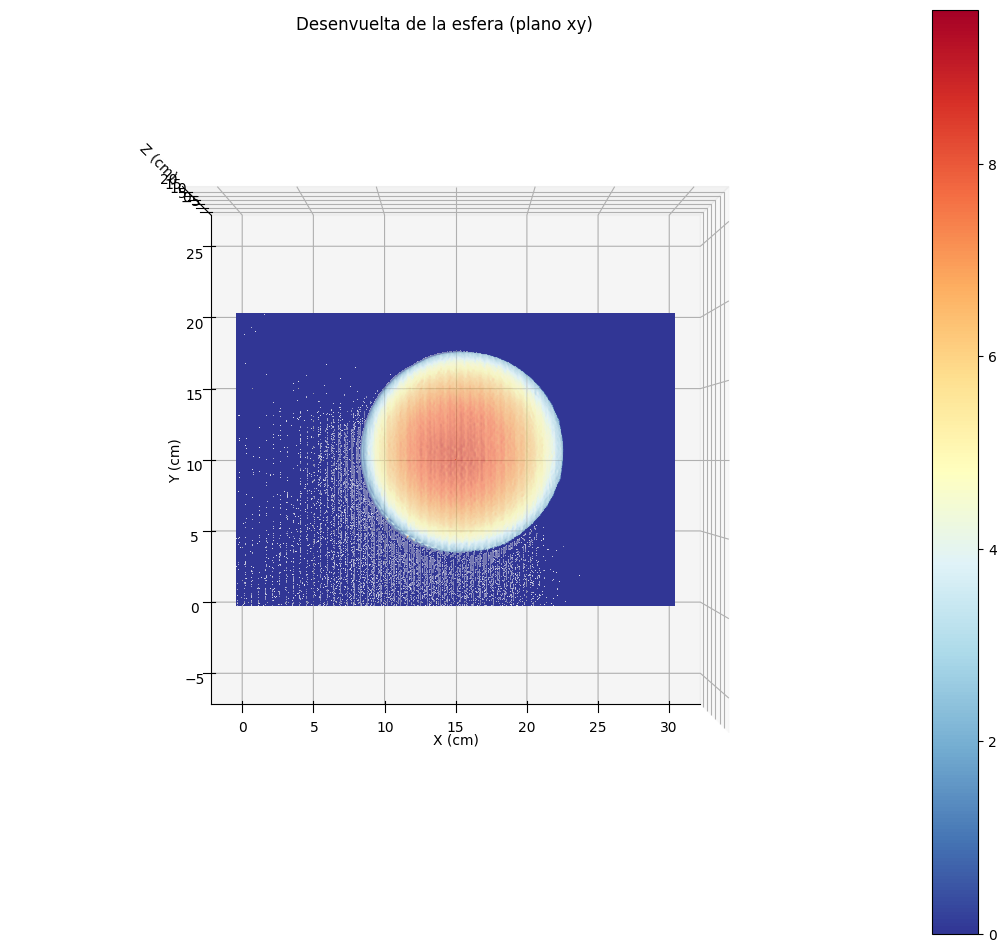

In [9]:

fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=90, azim=-90, roll=0)

fig.colorbar(ax.plot_surface(x, y, final,cmap='RdYlBu_r',rstride=3,cstride=3))

ax.set_box_aspect([1.0, 1.0, 1.0])
ax.set_xlabel('X (cm)')
ax.set_ylabel('Y (cm)')
ax.set_zlabel('Z (cm)')
ax.set_title('Desenvuelta de la esfera (plano xy)')
set_axes_equal(ax)
plt.show()

Text(0, 0.5, 'y(cm)')

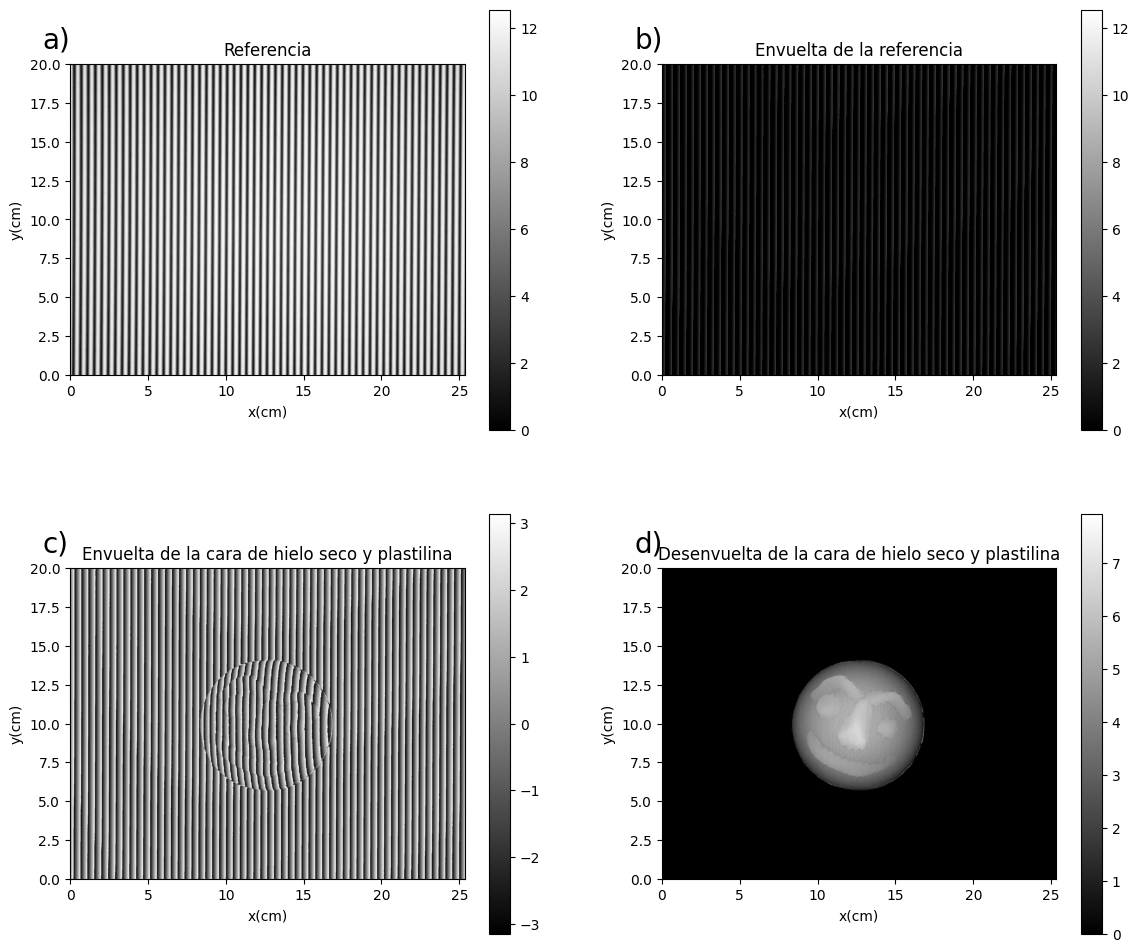

In [38]:
imagenrpl1 = Image.open("ref1_cara.jpg")
imagenrpl1 = color.rgb2gray(img_as_float(imagenrpl1))

imagenrpl2 = Image.open("ref2_cara.jpg")
imagenrpl2 = color.rgb2gray(img_as_float(imagenrpl2))

imagenrpl3 = Image.open("ref3_cara.jpg")
imagenrpl3 = color.rgb2gray(img_as_float(imagenrpl3))

imagenrpl4 = Image.open("ref4_cara.jpg")
imagenrpl4 = color.rgb2gray(img_as_float(imagenrpl4))

imagenpl1 = Image.open("1_cara.jpg")
imagenpl1 = color.rgb2gray(img_as_float(imagenpl1))

imagenpl2 = Image.open("2_cara.jpg")
imagenpl2 = color.rgb2gray(img_as_float(imagenpl2))

imagenpl3 = Image.open("3_cara.jpg")
imagenpl3 = color.rgb2gray(img_as_float(imagenpl3))

imagenpl4 = Image.open("4_cara.jpg")
imagenpl4 = color.rgb2gray(img_as_float(imagenpl4))

imagenrpl1 = exposure.rescale_intensity(imagenrpl1, out_range=(0, np.pi*4))
imagenrpl2 = exposure.rescale_intensity(imagenrpl2, out_range=(0, np.pi*4))
imagenrpl3 = exposure.rescale_intensity(imagenrpl3, out_range=(0, np.pi*4))
imagenrpl4 = exposure.rescale_intensity(imagenrpl4, out_range=(0, np.pi*4))

imagenpl1 = exposure.rescale_intensity(imagenpl1, out_range=(0, np.pi*4))
imagenpl2 = exposure.rescale_intensity(imagenpl2, out_range=(0, np.pi*4))
imagenpl3 = exposure.rescale_intensity(imagenpl3, out_range=(0, np.pi*4))
imagenpl4 = exposure.rescale_intensity(imagenpl4, out_range=(0, np.pi*4))

env_pl = np.arctan2(imagenpl4 - imagenpl2, imagenpl1 - imagenpl3)
env_refp = np.arctan2(imagenrpl4 - imagenrpl2, imagenrpl1 - imagenrpl3)

des_pl = unwrap_phase(env_pl-env_refp)

phi=des_pl
dx=0.55

arg=phi/(2*np.pi)
arg1=arg*dx
final=arg1/np.tan(0.076357)
final=np.where(final>0,final,0)

x, y = np.meshgrid(np.linspace(0*(2754/2174),20*(2754/2174),des_pl.shape[1]), np.linspace(0,20,des_pl.shape[0]))

fig, ax = plt.subplots(2, 2, figsize=[14,12])
ax = ax.ravel()

fig.colorbar(ax[0].imshow(imagenrpl1, cmap=CMAP, vmin=0, vmax=4 * np.pi, extent=[0,20*(2754/2174),0,20]), ax=ax[0])
ax[0].text(0.0, 1.0, 'a)', transform=ax[0].transAxes + trans,
            fontsize=20, va='bottom')
ax[0].set_title('Referencia')
ax[0].set_xlabel('x(cm)')
ax[0].set_ylabel('y(cm)')
fig.colorbar(ax[1].imshow(env_refp, cmap=CMAP, vmin=0, vmax=4 * np.pi, extent=[0,20*(2754/2174),0,20]), ax=ax[1])
ax[1].text(0.0, 1.0, 'b)', transform=ax[1].transAxes + trans,
            fontsize=20, va='bottom')
ax[1].set_title('Envuelta de la referencia')
ax[1].set_xlabel('x(cm)')
ax[1].set_ylabel('y(cm)')
fig.colorbar(ax[2].imshow(env_pl, cmap=CMAP, vmin=-np.pi, vmax=np.pi, extent=[0,20*(2754/2174),0,20]),ax=ax[2])
ax[2].text(0.0, 1.0, 'c)', transform=ax[2].transAxes + trans,
            fontsize=20, va='bottom')
ax[2].set_title('Envuelta de la cara de hielo seco y plastilina')
ax[2].set_xlabel('x(cm)')
ax[2].set_ylabel('y(cm)')
fig.colorbar(ax[3].imshow(final , cmap=CMAP,extent=[0,20*(2754/2174),0,20]), ax=ax[3])
ax[3].text(0.0, 1.0, 'd)', transform=ax[3].transAxes + trans,
            fontsize=20, va='bottom')
ax[3].set_title('Desenvuelta de la cara de hielo seco y plastilina')
ax[3].set_xlabel('x(cm)')
ax[3].set_ylabel('y(cm)')

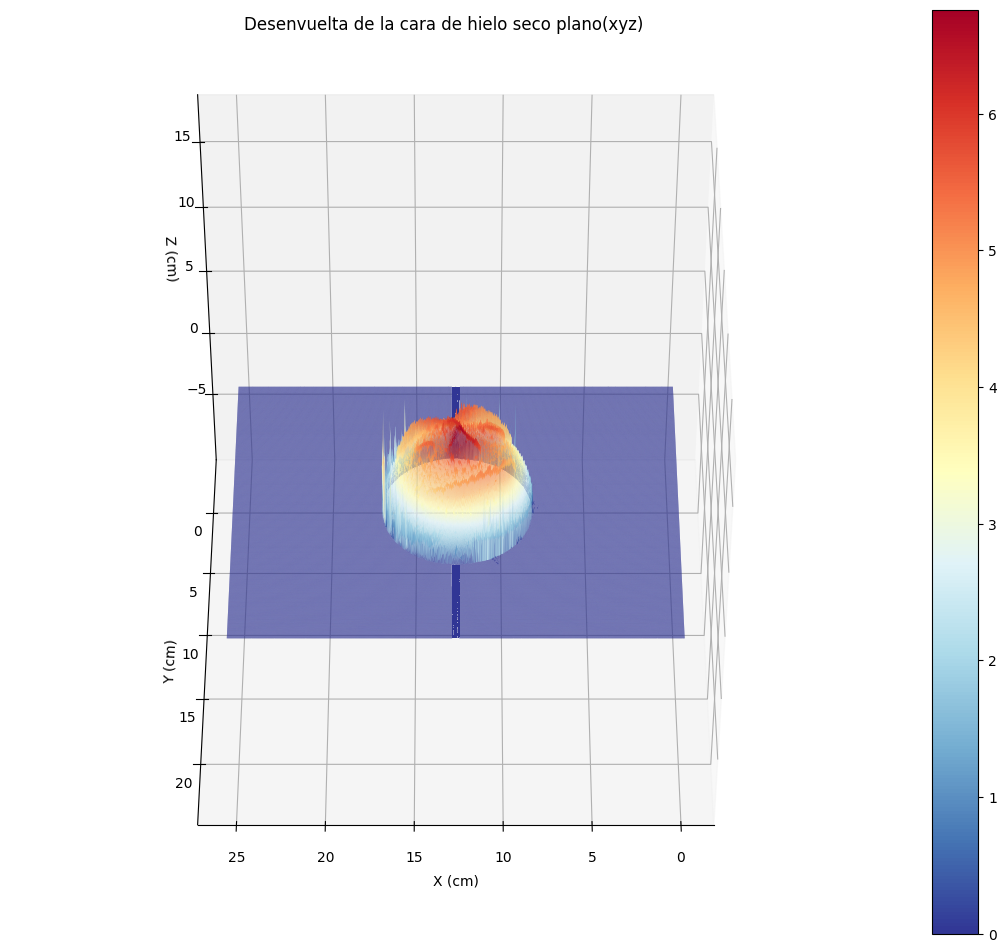

In [11]:

fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=45, azim=-270, roll=0)

fig.colorbar(ax.plot_surface(x, y, final,cmap='RdYlBu_r',rstride=3,cstride=3))

ax.set_box_aspect([1.0, 1.0, 1.0])
ax.set_xlabel('X (cm)')
ax.set_ylabel('Y (cm)')
ax.set_zlabel('Z (cm)')
ax.set_title('Desenvuelta de la cara de hielo seco plano(xyz)')
set_axes_equal(ax)
plt.show()
